# VoxCeleb2 --- Stats

|                    | Dev       |
| ---                | ---       |
| Number of samples  | 1,092,009 |
| Number of speakers |     5,994 |

In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
os.chdir('../..')
sys.path.insert(1, os.path.join(sys.path[0], '../..'))

In [2]:
from glob import glob
from tqdm import tqdm
import soundfile as sf

from plotnine import *
import pandas as pd

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.0


In [3]:
DATASET_NAME = 'VoxCeleb2'
DATASET_PATH = 'data/voxceleb2'

In [4]:
files = glob(f'{DATASET_PATH}/**/**/*.wav')
speakers = glob(f'{DATASET_PATH}/*')

print(f'Number of samples: {len(files)}')
print(f'Number of speakers: {len(speakers)}')

Number of samples: 1092009
Number of speakers: 5994


## Length distribution

100%|█████████████████████████████████████████████████████████████████████████| 1092009/1092009 [10:23<00:00, 1752.03it/s]


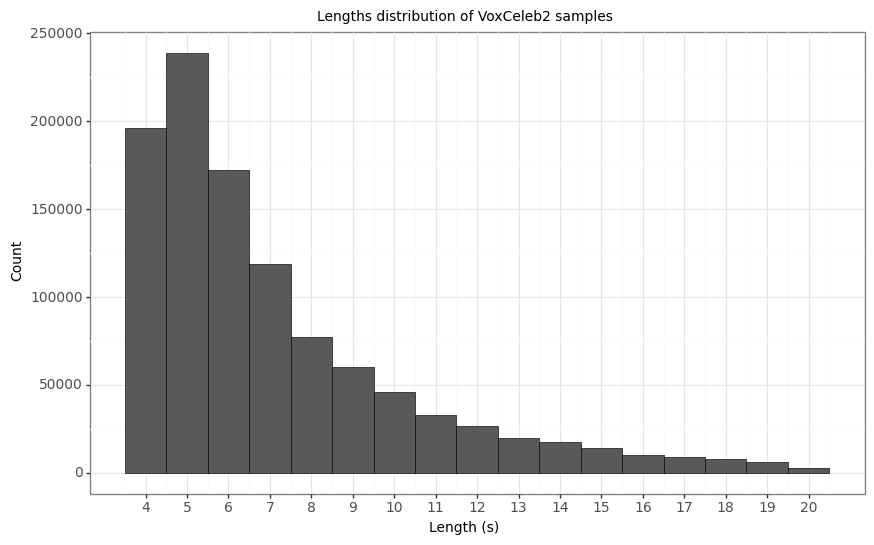

<ggplot: (8757288558803)>

In [4]:
lengths = []

for file in tqdm(files):
    audio, sr = sf.read(file, dtype='int16')
    lengths.append(len(audio))

df_length = pd.DataFrame({'Length': lengths})
df_length['Length'] = df_length['Length'] / 16000
df_length = df_length.drop(df_length[df_length['Length'] > 20].index)

plot = (
    ggplot()
    + xlab('Length (s)')
    + ylab('Count')
    + ggtitle(f'Lengths distribution of {DATASET_NAME} samples')
    + theme_bw()
    + theme(figure_size=(10, 6), text=element_text(size=10))
    + geom_histogram(
        df_length,
        aes(x='Length'),
        binwidth=1,
        color='black',
        position='identity',
        size=0.25
    )
    + scale_x_continuous(breaks=list(range(4, 21, 1)))
)

plot

In [7]:
100 * len(df_length[df_length['Length'] <= 4]) / len(df_length)

1.2694537686908758

In [8]:
100 * len(df_length[df_length['Length'] > 10]) / len(df_length)

19.47919845387041